## Business Understanding
Fraud detection is the process of identifying and preventing fraudulent activities within various systems, such as financial transactions, online platforms, insurance claims, and more. It involves using advanced technologies and techniques to analyze data and patterns, flagging potentially suspicious activities or anomalies that could indicate fraudulent behavior. The goal of fraud detection is to minimize financial losses, protect users, and maintain the integrity of the system.

Fraud detection is crucial in industries such as finance, e-commerce, insurance, healthcare, and more. It helps protect both businesses and individuals from financial losses and other negative consequences associated with fraudulent activities.

### a).Defining the problem.
The problem in this case is predicting whether a transaction is fraudalent or not.

In [1]:
import pandas as pd

In [17]:
#reading the dataset
df= pd.read_csv(r'C:\Users\admin\Desktop\fraud\creditcard_csv.csv', low_memory=False)


In [3]:
#previewing the first five rows
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,'0'
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,'0'
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,'0'
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,'0'
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,'0'


In [18]:
#describing the dataset
df.describe().style.background_gradient(cmap='tab20c')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,94813.859575,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,88.349619
std,47488.145955,1.958696,1.651309,1.516255,1.415869,1.380247,1.332271,1.237094,1.194353,1.098632,1.088850,1.020713,0.999201,0.995274,0.958596,0.915316,0.876253,0.849337,0.838176,0.814041,0.770925,0.734524,0.725702,0.624460,0.605647,0.521278,0.482227,0.403632,0.330083,250.120109
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000
25%,54201.500000,-0.920373,-0.598550,-0.890365,-0.848640,-0.691597,-0.768296,-0.554076,-0.208630,-0.643098,-0.535426,-0.762494,-0.405571,-0.648539,-0.425574,-0.582884,-0.468037,-0.483748,-0.498850,-0.456299,-0.211721,-0.228395,-0.542350,-0.161846,-0.354586,-0.317145,-0.326984,-0.070840,-0.052960,5.600000
50%,84692.000000,0.018109,0.065486,0.179846,-0.019847,-0.054336,-0.274187,0.040103,0.022358,-0.051429,-0.092917,-0.032757,0.140033,-0.013568,0.050601,0.048072,0.066413,-0.065676,-0.003636,0.003735,-0.062481,-0.029450,0.006782,-0.011193,0.040976,0.016594,-0.052139,0.001342,0.011244,22.000000
75%,139320.500000,1.315642,0.803724,1.027196,0.743341,0.611926,0.398565,0.570436,0.327346,0.597139,0.453923,0.739593,0.618238,0.662505,0.493150,0.648821,0.523296,0.399675,0.500807,0.458949,0.133041,0.186377,0.528554,0.147642,0.439527,0.350716,0.240952,0.091045,0.078280,77.165000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000


In [5]:
#checking the shape of dataset
df.shape

(284807, 31)

In [6]:
#checking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
#checking for duplicates
df.duplicated().sum()

1081

In [8]:
#dealing wth the duplicates
df.drop_duplicates(keep='first')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,'0'
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,'0'
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,'0'
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,'0'
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,'0'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,'0'
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,'0'
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,'0'
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,'0'


In [22]:
#checking for null values
df.isna().sum()/len(df)

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

In [23]:
#checking the percentage of null values in the dataset
null_values= df.isna().sum()
total_shells=np.product(df.shape)
total_missing_values= null_values.sum()
percentage_missing_values=(total_missing_values/total_shells)*100
print(f'The dataset contains {percentage_missing_values} of values') 

The dataset contains 0.0 of values


In [26]:
# checking the duplicates
data= df.duplicated().sum()
print(f'There is {data} values in the dataset so we remove them')

There is 1081 values in the dataset so we remove them


In [27]:
df= df.drop_duplicates()
after_remove_duplicates = df.duplicated().sum()
print(f'There is {after_remove_duplicates} values in the dataset')

There is 0 values in the dataset


In [10]:
#checking the count for y
df['Class'].value_counts()

'0'    284315
'1'       492
Name: Class, dtype: int64

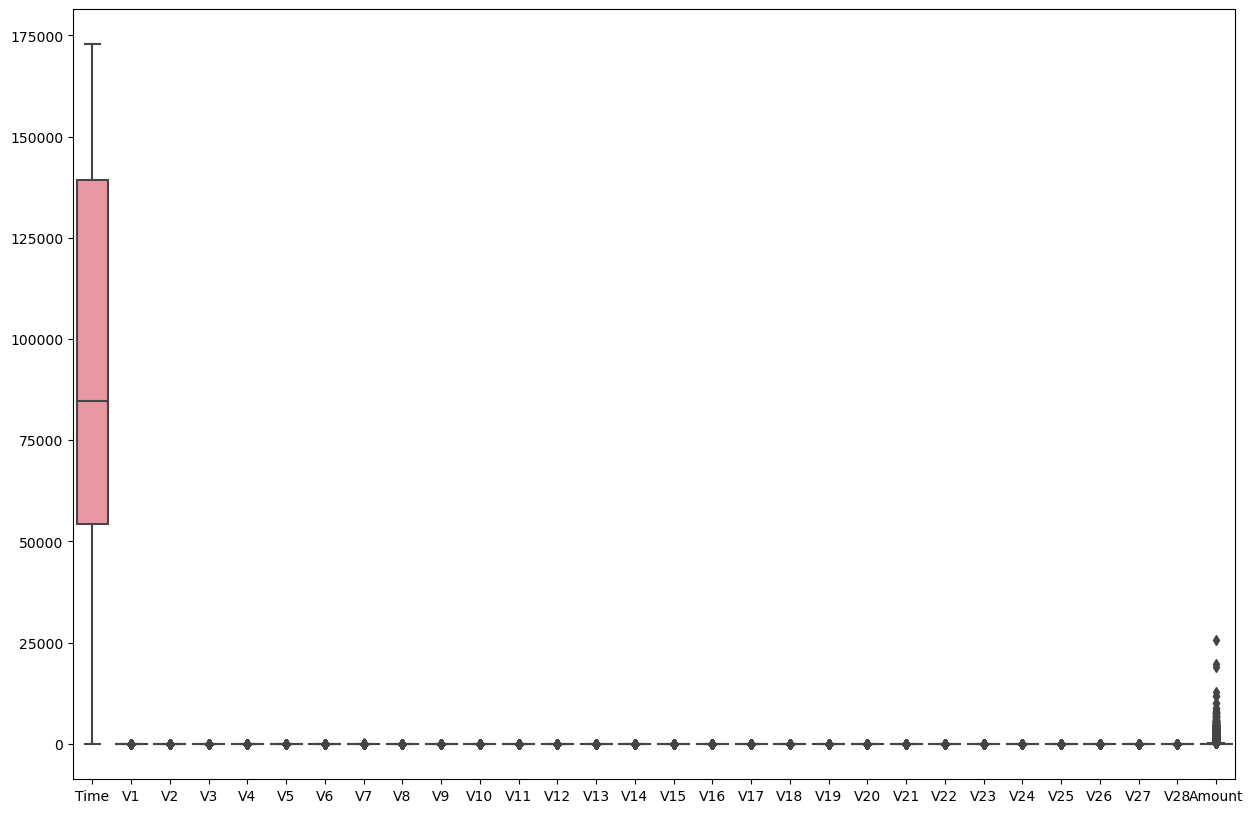

In [11]:
#checking for outliers using boxplot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))
sns.boxplot(df)
plt.show()



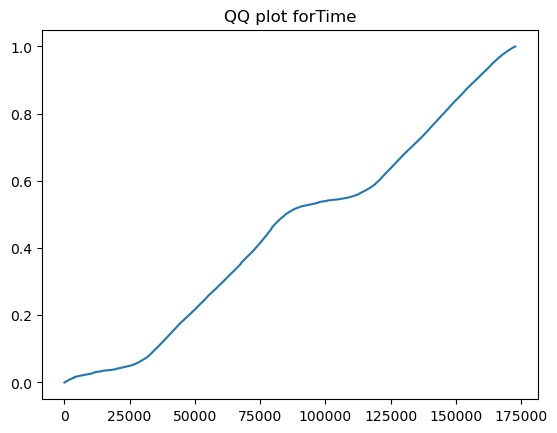

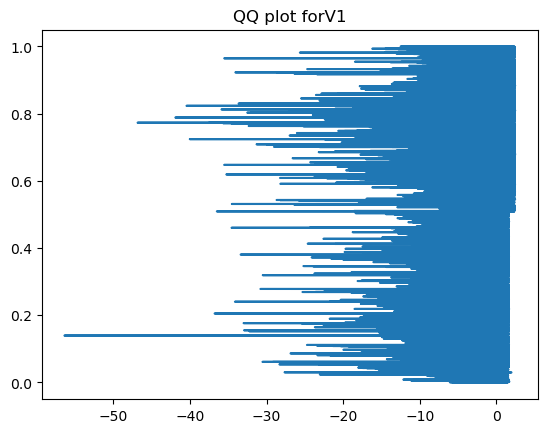

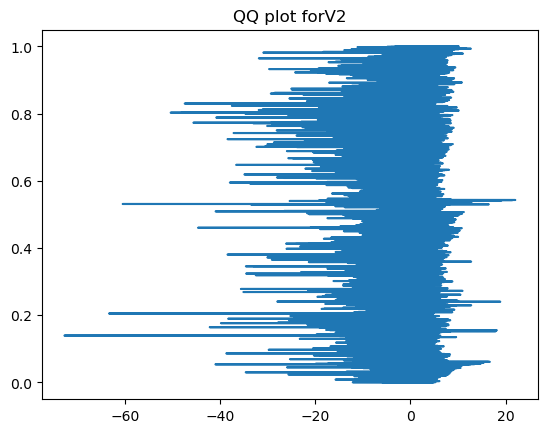

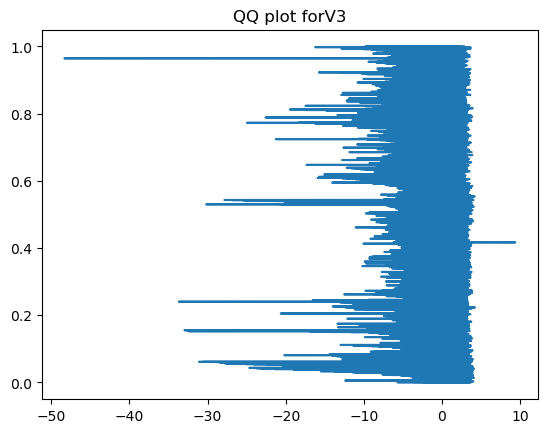

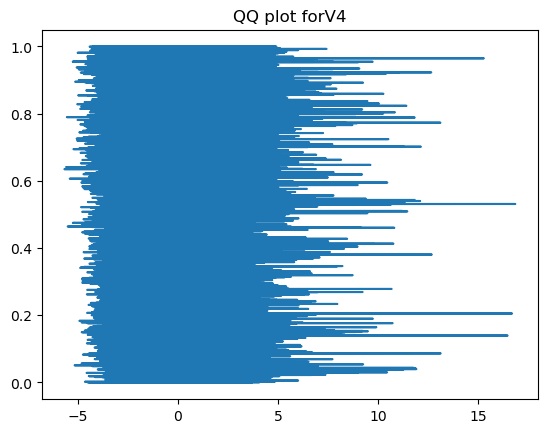

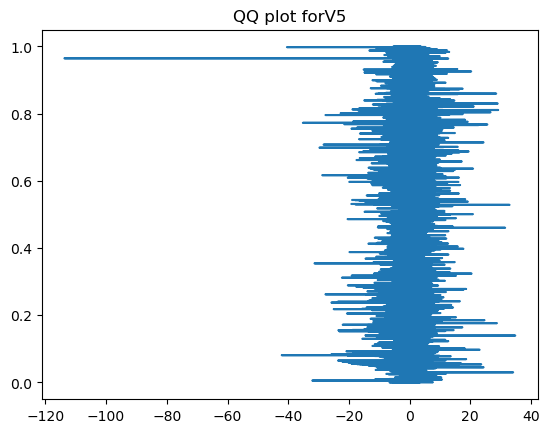

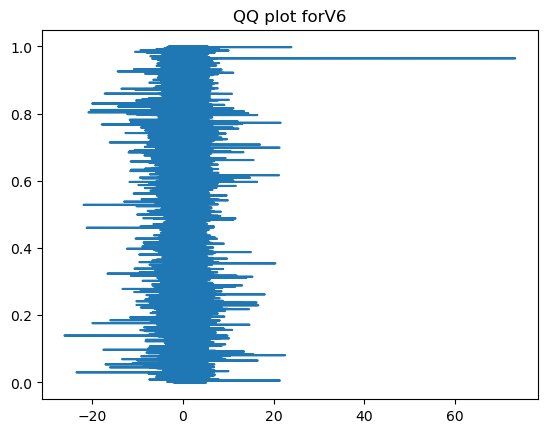

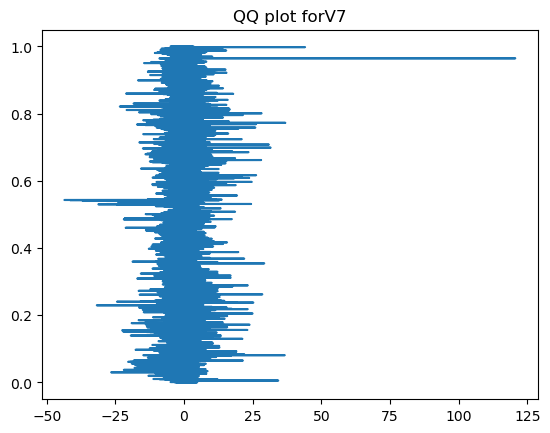

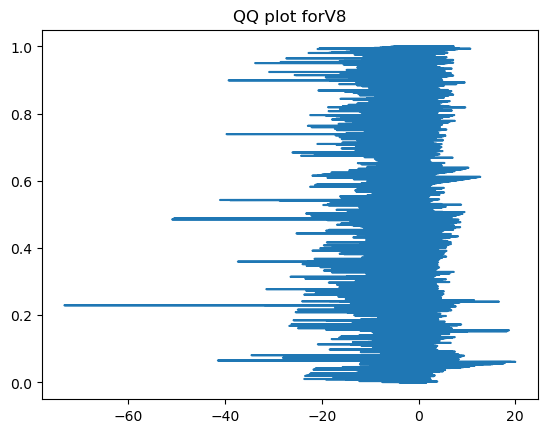

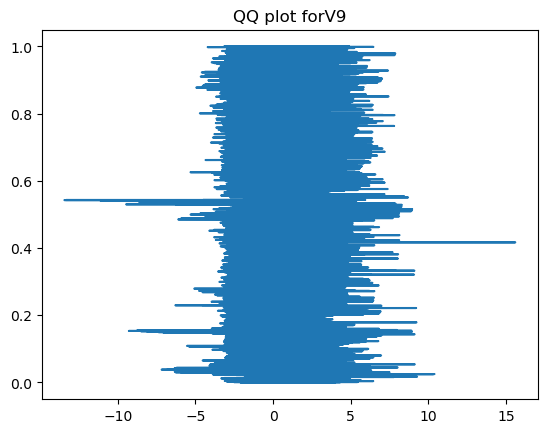

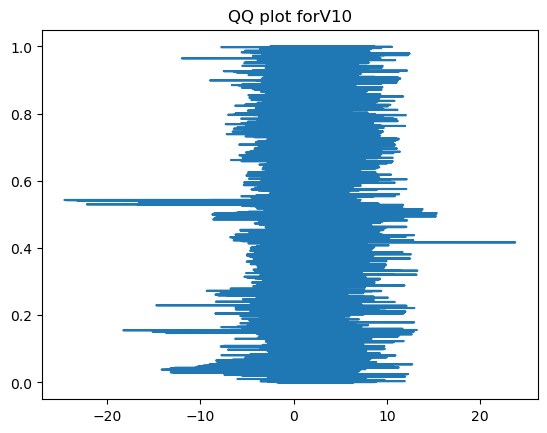

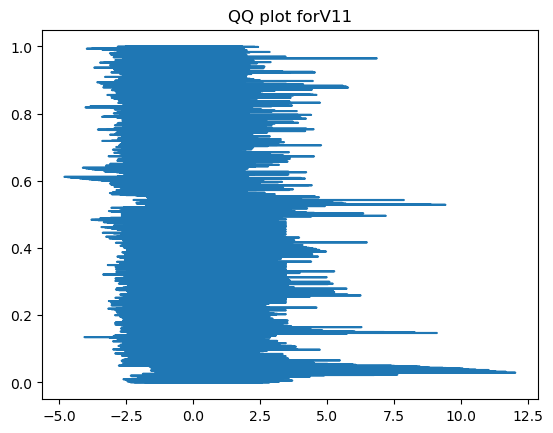

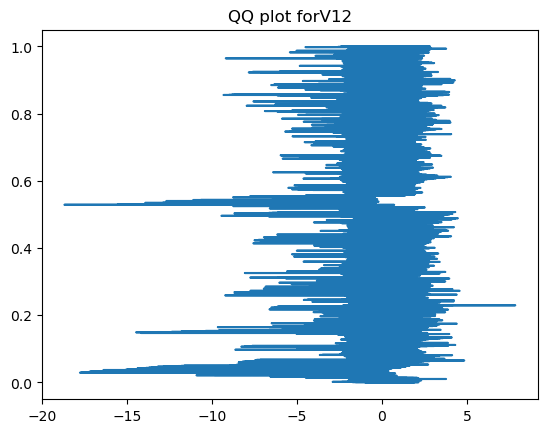

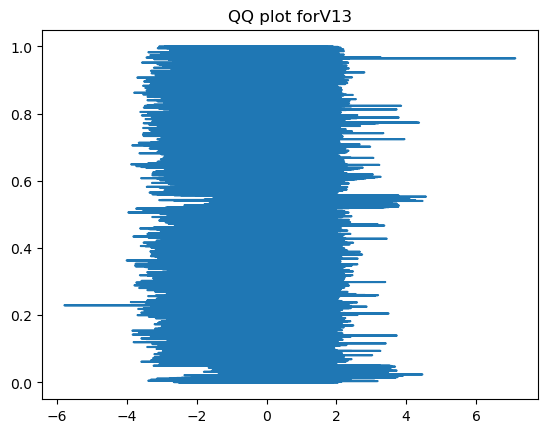

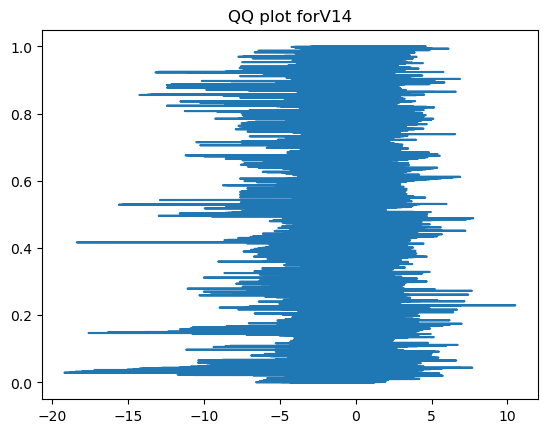

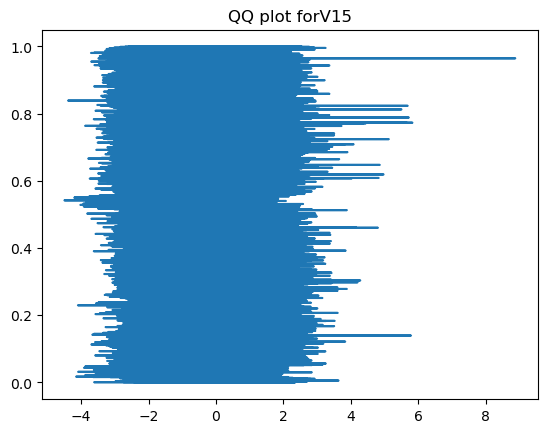

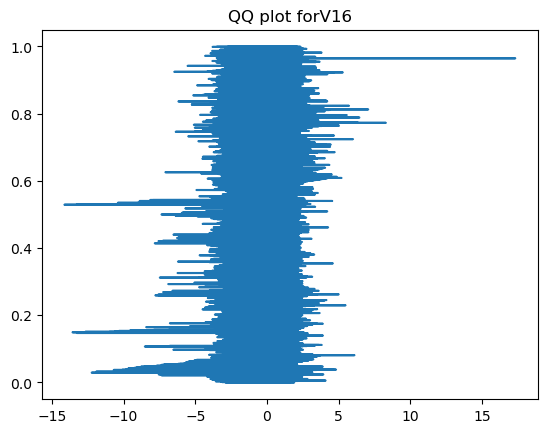

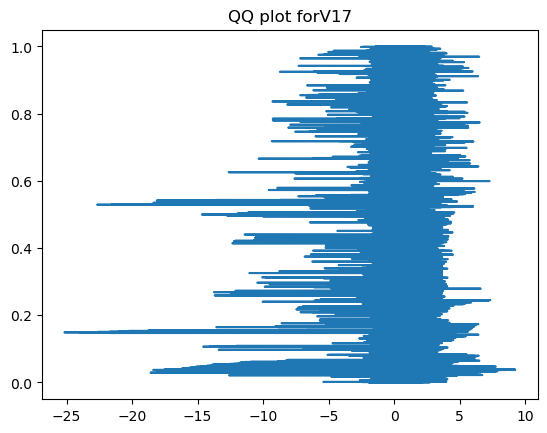

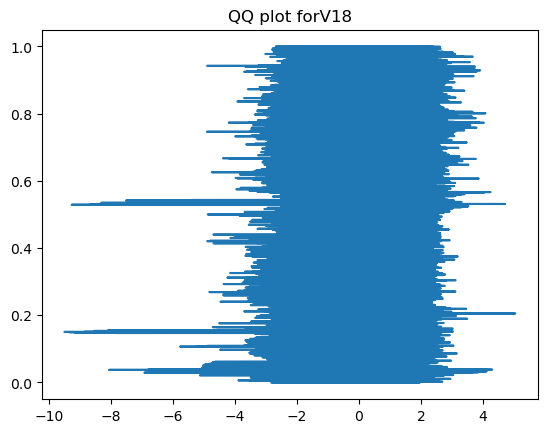

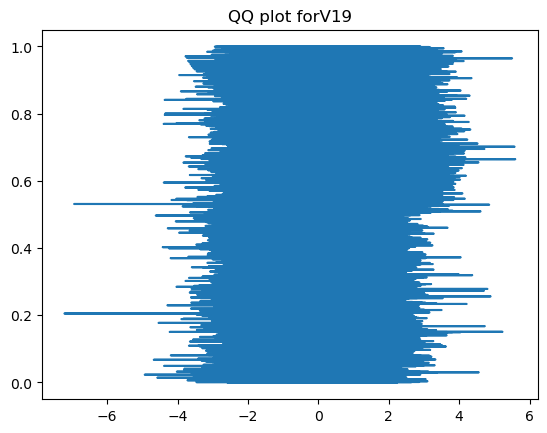

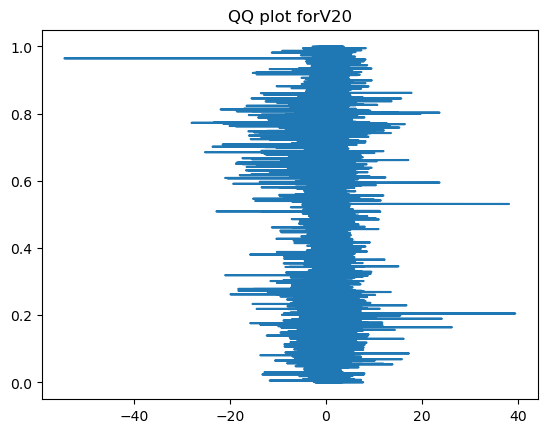

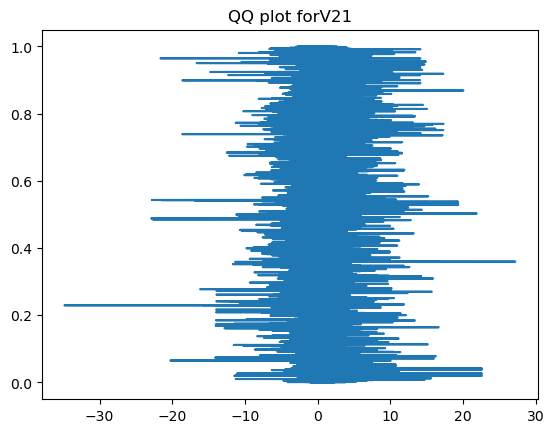

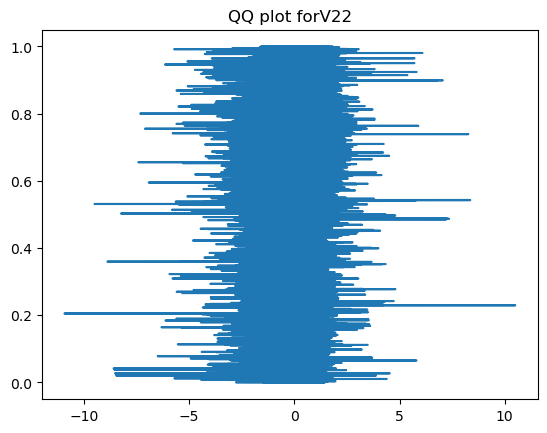

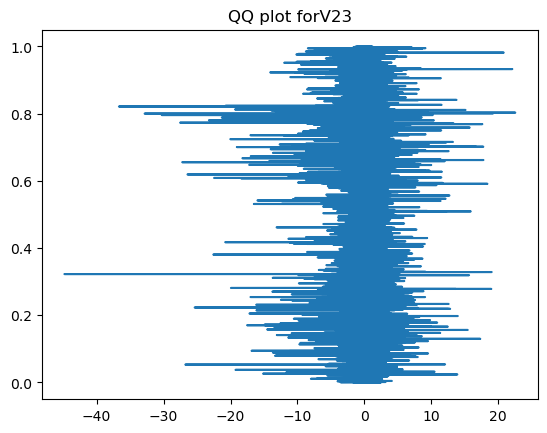

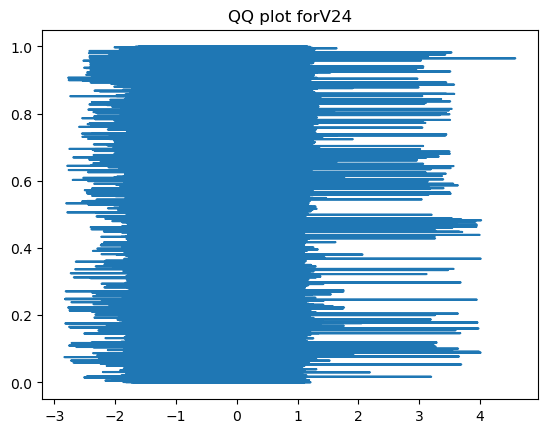

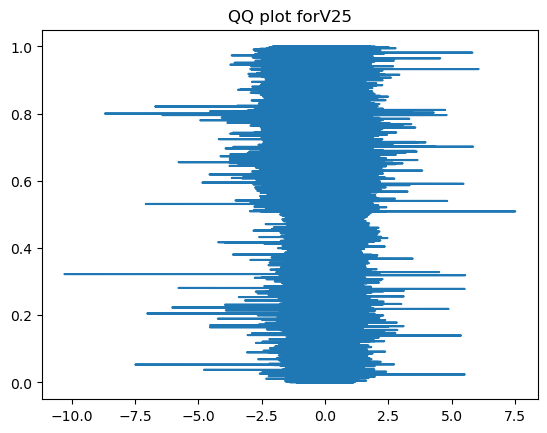

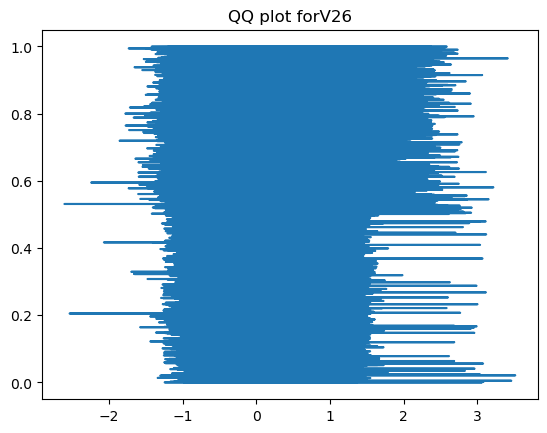

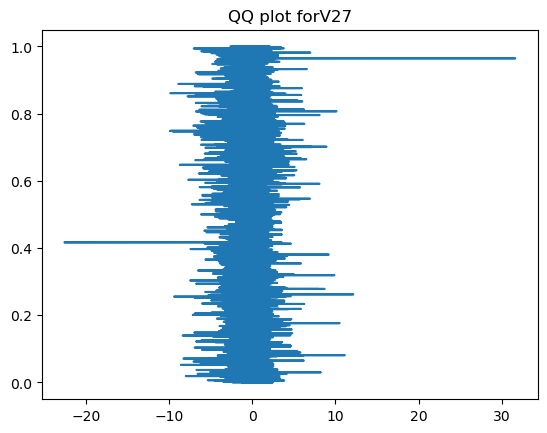

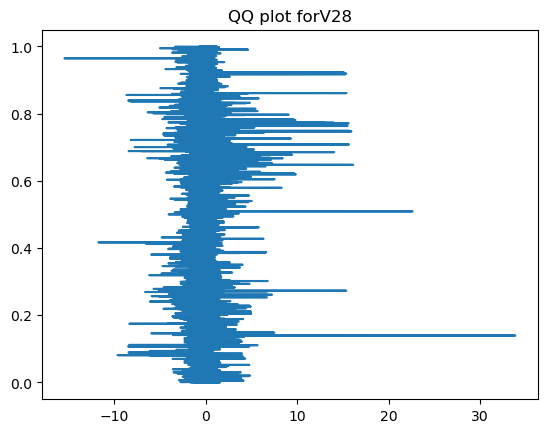

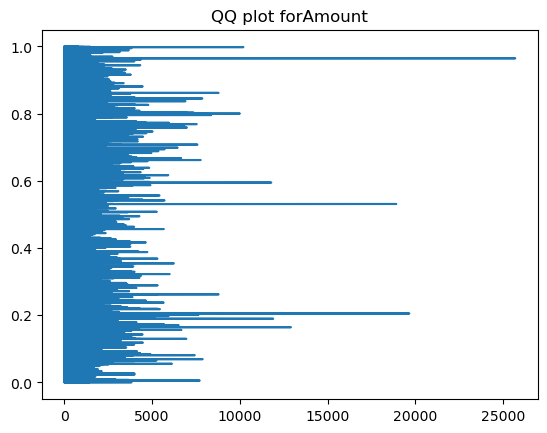

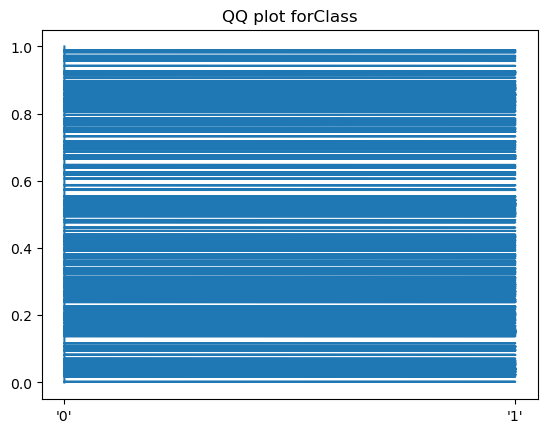

In [12]:
import numpy as np
for i in df:
    plt.figure()
    plt.title('QQ plot for'+ i)
    plt.plot(df[i], np.linspace(0,1,len(df[i])))
    plt.show()


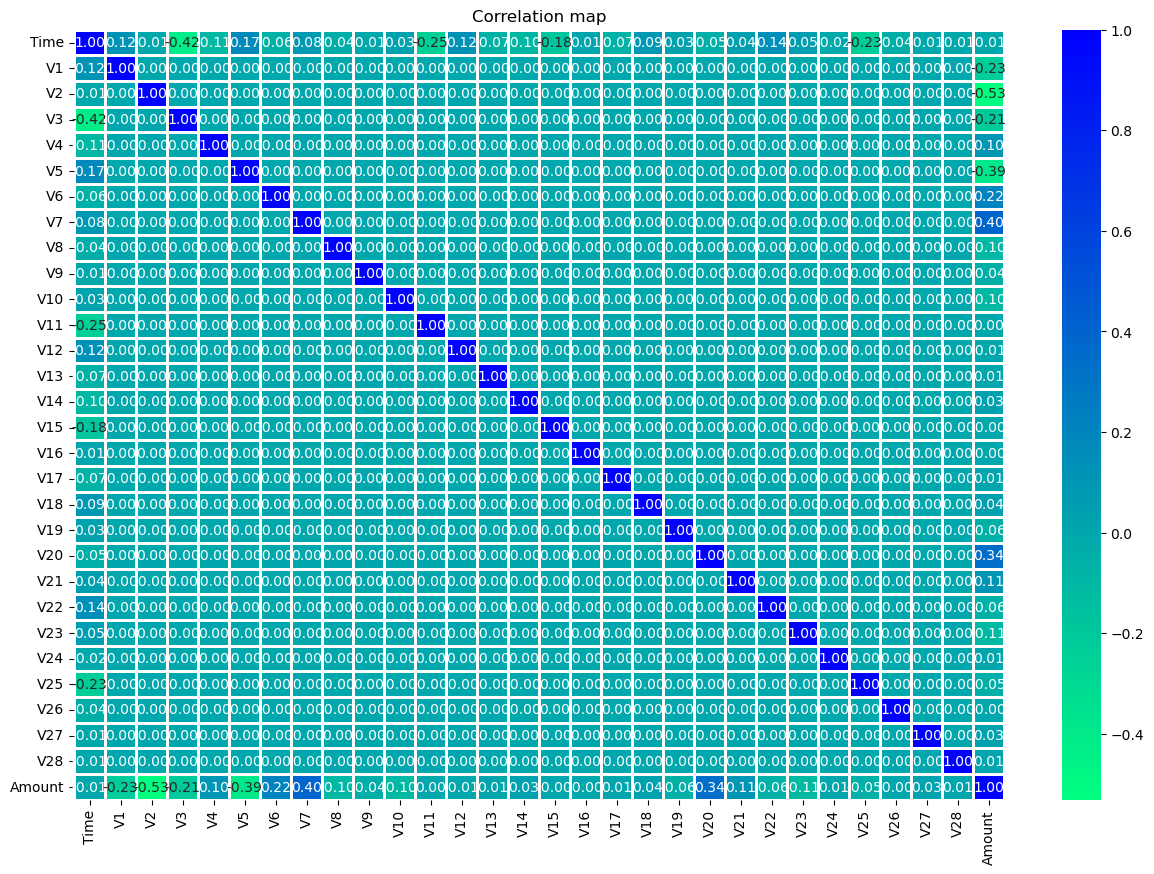

In [21]:
#checking the correlation matrix
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True, cmap='winter_r', fmt='.2f',linewidths=1)
plt.title('Correlation map')
plt.show()

Perform Shapiro-Wilk Test to test if data is normally distributed.
The Shapiro-Wilk test is a statistical test that can be used to test the null hypothesis that a data set is normally distributed. The test statistic is a measure of how well the data fits a normal distribution. If the test statistic is small, then the null hypothesis is rejected, and we can conclude that the data is not normally distributed.

Null Hypothesis(H0)- The data is not normally distributed.

Alternative Hypothesis(Ha)- The data is normally distributed.

 Interpretation

* If the p-value is less than 0.05, then we reject the null hypothesis and conclude that the data is not normally distributed.

* If the p-value is greater than 0.05, then we fail to reject the null hypothesis and conclude that the data is normally distributed.





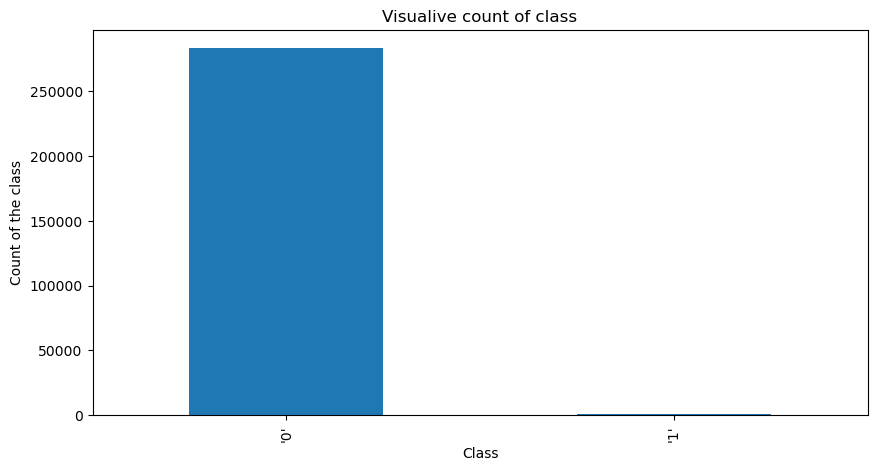

In [28]:
plt.figure(figsize=(10,5))
df['Class'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.title('Visualive count of class')
plt.xlabel('Class')
plt.ylabel('Count of the class')
plt.show()

In [13]:
X= df.drop('Class', axis=1)

In [14]:

import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

stat, p = stats.shapiro(X)

print('Test statistics', stat)
if p >= 0.05:
    print("fail to reject null hypothesis and data is normally distributed")
else:
    print("reject null hypothesis and data is not normaly distributed")

print('p-value', p)

Test statistics 0.1589338183403015
reject null hypothesis and data is not normaly distributed
p-value 0.0


In [15]:
#define y variable
y= df['Class']

Classification modeling.

This is a type of machine learning that is used to predict the category or class of an object or event. Classification models are typically used to solve problems where the output variable is categorical, such as predicting whether a customer will churn or not. There are many different types of classification models, each with its own strengths and weaknesses. Some of the most common types of classification models include logistic regression, decision trees, and support vector machines.

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
#from xgboost import XGBClassifier



In [31]:
# convert categorical column into numerical column
for col in df.select_dtypes(include='object'):
    labelencoder=LabelEncoder()
    labelencoder.fit(df[col].unique())
    df[col]=labelencoder.transform(df[col])

In [34]:
#split data into independent and dependent variables
X=df.drop('Class', axis=1)
y = df['Class']
#Normalization of the data using standard scaler
scaler=StandardScaler()
X=scaler.fit_transform(X)
# split the data into train and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [35]:
#Create function for machine learning modeling
def machine_learning_model(model, X_train, X_test, y_train, y_test):
    '''
    In the function we write about the code for machine learning model
    Firstly we fit the train data to the model
    and predict the values with test data and store values with variable
    and print the accuracy score along with classification and confusion matrix
    '''
    print(f'The{model} ')
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    model_score=accuracy_score(y_test, y_pred)
    print(f'\nThe Accuracy score of the {model} is {model_score*100 :.2f}')
    print(f'\n {classification_report(y_test, y_pred)}')
    print(f'\n {confusion_matrix(y_test, y_pred)}')
    matrix=confusion_matrix(y_test,y_pred)
    sns.heatmap(matrix, annot=True, cmap='Reds',fmt='.2f',linewidths=1)
    plt.show()
    print('_'*30)


In [38]:
models={
    'logistic' :LogisticRegression(penalty='l2'),
    'decision' :DecisionTreeClassifier(criterion='gini',splitter='best'),
    'random' :RandomForestClassifier(n_estimators=50,criterion='gini'),
    'knn' :KNeighborsClassifier()
}

TheLogisticRegression() 

The Accuracy score of the LogisticRegression() is 99.92

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.89      0.53      0.67        90

    accuracy                           1.00     56746
   macro avg       0.94      0.77      0.83     56746
weighted avg       1.00      1.00      1.00     56746


 [[56650     6]
 [   42    48]]


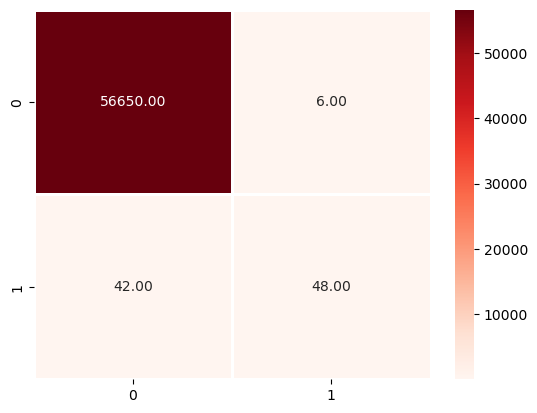

______________________________
TheDecisionTreeClassifier() 

The Accuracy score of the DecisionTreeClassifier() is 99.90

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.67      0.72      0.70        90

    accuracy                           1.00     56746
   macro avg       0.83      0.86      0.85     56746
weighted avg       1.00      1.00      1.00     56746


 [[56624    32]
 [   25    65]]


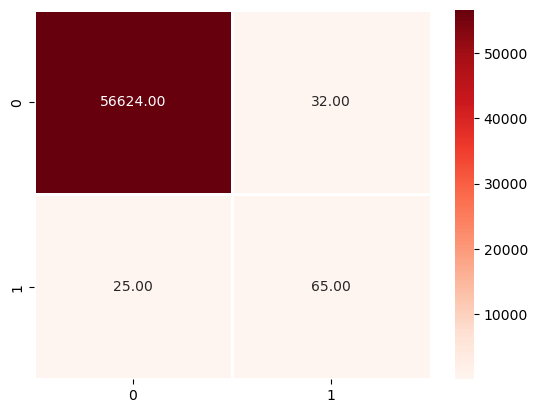

______________________________
TheRandomForestClassifier(n_estimators=50) 

The Accuracy score of the RandomForestClassifier(n_estimators=50) is 99.96

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.99      0.74      0.85        90

    accuracy                           1.00     56746
   macro avg       0.99      0.87      0.92     56746
weighted avg       1.00      1.00      1.00     56746


 [[56655     1]
 [   23    67]]


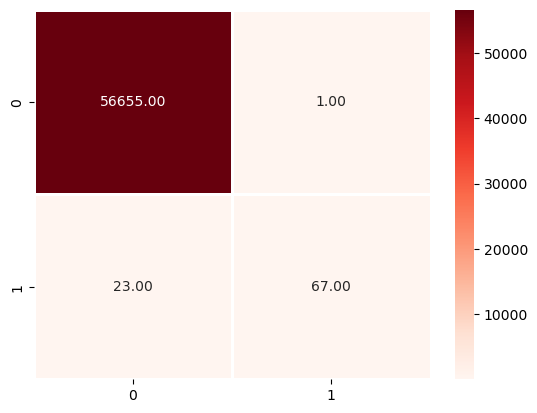

______________________________
TheKNeighborsClassifier() 

The Accuracy score of the KNeighborsClassifier() is 99.95

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.97      0.70      0.81        90

    accuracy                           1.00     56746
   macro avg       0.98      0.85      0.91     56746
weighted avg       1.00      1.00      1.00     56746


 [[56654     2]
 [   27    63]]


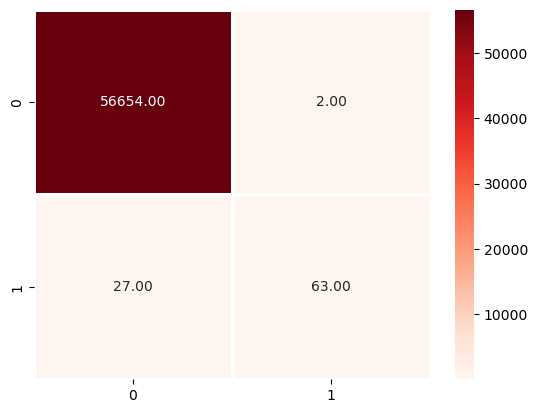

______________________________


In [39]:
for i in range(len(models)):
    model_names= list(models.values())[i]
    names=list(models.keys())[i]
    #apply the machine learning function to the models
    machine_learning_model(model_names,X_train,X_test,y_train,y_test)

TheRandomForestClassifier() 

The Accuracy score of the RandomForestClassifier() is 99.95

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.98      0.71      0.83        90

    accuracy                           1.00     56746
   macro avg       0.99      0.86      0.91     56746
weighted avg       1.00      1.00      1.00     56746


 [[56655     1]
 [   26    64]]


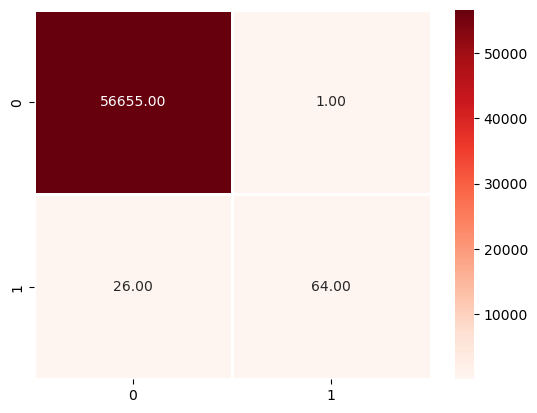

______________________________


In [41]:
random=RandomForestClassifier()
machine_learning_model(random, X_train, X_test, y_train, y_test)

In [42]:
#Pickle file
import pickle as pkl
# dump the file
pkl.dump(random,open('RandomForest.pkl','wb'))
